# Recommendation maps

This notebook joins __calidad_ep_hex9.gpkg__ (Generated on notebook 30) and __santiago_hexvariableanalysis_4_5_kmh__, located on database, in res 9 and for the extended buffer only.

Then, using the __recommendation_dict__ (Variables related to a given recommendation that will produce projects), the __variables'mean__ is calculated for each recommendation. The local output will be used to produce study maps for each recommendation.

## Import libraries

In [1]:
accesibilidad_urbana = "../../../"

In [2]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

from shapely import Point

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join(accesibilidad_urbana))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [3]:
# Save recommendations result locally?
save = True

## Load data

#### Load data - Calidad ep (pje_ep) hex 9 [Notebook 30]

In [4]:
calidad_ep_hex9_dir = accesibilidad_urbana + "data/external/santiago/calidad_ep/calidad_ep_hex9.gpkg"
calidad_ep_hex9 = gpd.read_file(calidad_ep_hex9_dir)

# Show
print(calidad_ep_hex9.crs)
print(calidad_ep_hex9.shape)
calidad_ep_hex9.head(1)

EPSG:4326
(1524, 5)


,hex_id,res,city,pje_ep,geometry
0,89b2c556a93ffff,9,alamedabuffer_4500m,0.994048,"POLYGON ((-70.62964 -33.41721, -70.63082 -33.4..."


<Axes: >

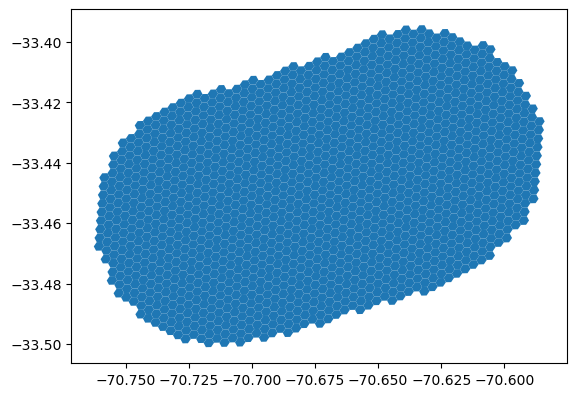

In [5]:
calidad_ep_hex9.plot()

#### Load data - hexvariableanalysis for 4.5km/hr

In [7]:
res = 9
variablesanalysis_schema = 'projects_research'
variablesanalysis_table = 'santiago_hexvariableanalysis_4_5_kmh'
query = f"SELECT * FROM {variablesanalysis_schema}.{variablesanalysis_table} WHERE res = {res}"
variablesanalysis_gdf = aup.gdf_from_query(query, geometry_col='geometry')

# Show
print(variablesanalysis_gdf.crs)
print(variablesanalysis_gdf.shape)
variablesanalysis_gdf.head(2)

epsg:4326
(8416, 172)


,hex_id,geometry,oficinas_count,hotel_count,houses_count,social_viv_count,compact_count,temp_count,inter_count,noise_count,...,edu_especial_pub_scaled,bibliotecas_scaled,centro_edu_amb_scaled,paradas_tp_ruta_scaled,paradas_tp_metro_scaled,paradas_tp_tren_scaled,oficinas_scaled,ciclovias_scaled,estaciones_bicicletas_scaled,res
0,89b2c508003ffff,"POLYGON ((-70.53150 -33.49497, -70.53266 -33.4...",0.002872,0.0,51.567598,0.0,0.000000,-3.115992,19.980392,67.500000,...,2.279412,0.0,0.0,0.0,0.0,0.0,0.002542,0.220588,0.0,9
1,89b2c508007ffff,"POLYGON ((-70.52852 -33.49633, -70.52969 -33.4...",0.000000,0.0,60.411443,0.0,16.481282,-3.410160,31.000000,66.602564,...,1.302083,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,9


<Axes: >

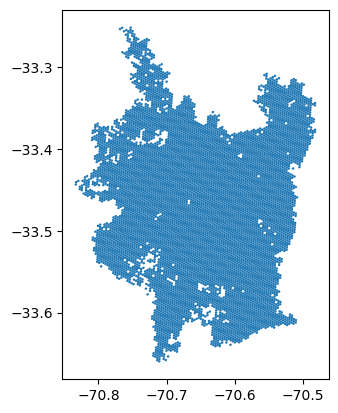

In [8]:
variablesanalysis_gdf.plot()

## Filter data to extended buffer

In [9]:
hex_ids_lst = list(calidad_ep_hex9.hex_id.unique())
variablesanalysis_buffer = variablesanalysis_gdf.loc[variablesanalysis_gdf.hex_id.isin(hex_ids_lst)].copy()

# Show
print(variablesanalysis_buffer.shape)
variablesanalysis_buffer.head(2)

(1519, 172)


,hex_id,geometry,oficinas_count,hotel_count,houses_count,social_viv_count,compact_count,temp_count,inter_count,noise_count,...,edu_especial_pub_scaled,bibliotecas_scaled,centro_edu_amb_scaled,paradas_tp_ruta_scaled,paradas_tp_metro_scaled,paradas_tp_tren_scaled,oficinas_scaled,ciclovias_scaled,estaciones_bicicletas_scaled,res
1136,89b2c50b24bffff,"POLYGON ((-70.60665 -33.46935, -70.60782 -33.4...",3.621576,0.0,529.912892,56.562221,37.528046,-1.384293,90.413043,64.746377,...,2.6875,0.0,0.0,10.0,8.75,0.0,3.234385,1.71875,0.25,9
1138,89b2c50b253ffff,"POLYGON ((-70.60313 -33.46503, -70.60430 -33.4...",0.855759,0.0,173.882684,0.000000,0.000000,-0.348340,67.569106,55.855263,...,2.0000,0.0,0.0,10.0,10.00,0.0,0.757593,2.75000,2.50,9


## Merge data

In [10]:
variablesanalysis_pje_ep = pd.merge(variablesanalysis_buffer,calidad_ep_hex9[['hex_id','pje_ep']],on='hex_id')
# Show
print(variablesanalysis_pje_ep.shape)
variablesanalysis_pje_ep.head(2)

(1519, 173)


,hex_id,geometry,oficinas_count,hotel_count,houses_count,social_viv_count,compact_count,temp_count,inter_count,noise_count,...,bibliotecas_scaled,centro_edu_amb_scaled,paradas_tp_ruta_scaled,paradas_tp_metro_scaled,paradas_tp_tren_scaled,oficinas_scaled,ciclovias_scaled,estaciones_bicicletas_scaled,res,pje_ep
0,89b2c50b24bffff,"POLYGON ((-70.60665 -33.46935, -70.60782 -33.4...",3.621576,0.0,529.912892,56.562221,37.528046,-1.384293,90.413043,64.746377,...,0.0,0.0,10.0,8.75,0.0,3.234385,1.71875,0.25,9,0.688788
1,89b2c50b253ffff,"POLYGON ((-70.60313 -33.46503, -70.60430 -33.4...",0.855759,0.0,173.882684,0.000000,0.000000,-0.348340,67.569106,55.855263,...,0.0,0.0,10.0,10.00,0.0,0.757593,2.75000,2.50,9,0.900147


## Recommentadion maps data

In [11]:
# Convert pje_ep to pje_ep_scaled by multiplying its value by 10 (It is already from 0 to 1)
variablesanalysis_pje_ep['pje_ep_scaled'] = variablesanalysis_pje_ep['pje_ep']*10
# Show
print(variablesanalysis_pje_ep.shape)
variablesanalysis_pje_ep.head(2)

(1519, 174)


,hex_id,geometry,oficinas_count,hotel_count,houses_count,social_viv_count,compact_count,temp_count,inter_count,noise_count,...,centro_edu_amb_scaled,paradas_tp_ruta_scaled,paradas_tp_metro_scaled,paradas_tp_tren_scaled,oficinas_scaled,ciclovias_scaled,estaciones_bicicletas_scaled,res,pje_ep,pje_ep_scaled
0,89b2c50b24bffff,"POLYGON ((-70.60665 -33.46935, -70.60782 -33.4...",3.621576,0.0,529.912892,56.562221,37.528046,-1.384293,90.413043,64.746377,...,0.0,10.0,8.75,0.0,3.234385,1.71875,0.25,9,0.688788,6.887884
1,89b2c50b253ffff,"POLYGON ((-70.60313 -33.46503, -70.60430 -33.4...",0.855759,0.0,173.882684,0.000000,0.000000,-0.348340,67.569106,55.855263,...,0.0,10.0,10.00,0.0,0.757593,2.75000,2.50,9,0.900147,9.001474


In [16]:
# Recommendations and its variables of interest
v_1 = """
recommendation_dict = {'recommendation_1':['sitios_historicos_scaled',
                                           'paradas_tp_metro_scaled',
                                           'museos_scaled',
                                           'bibliotecas_scaled'
                                          ],
                       'recommendation_2':['ciclovias_scaled',
                                           'estaciones_bicicletas_scaled',
                                           'paradas_tp_ruta_scaled',
                                           'paradas_tp_metro_scaled',
                                           'paradas_tp_tren_scaled',
                                           'noise_scaled',
                                           'temp_scaled',
                                           'inter_scaled',
                                           'ndvi_scaled',
                                           'pje_ep_scaled',
                                           'ep_plaza_small_scaled',
                                           'ep_plaza_big_scaled',
                                           'houses_scaled'
                                          ],
                       'recommendation_3':['centro_recyc_scaled',
                                           'ep_plaza_small_scaled',
                                           'eq_deportivo_scaled',
                                           'club_deportivo_scaled',
                                           'clinica_scaled',
                                           'farmacia_scaled'
                                          ],
                       'recommendation_4':['pje_ep_scaled',
                                           'ep_plaza_small_scaled',
                                           'ep_plaza_big_scaled',
                                           'temp_scaled',
                                           'ndvi_scaled'
                                          ],
                       'recommendation_5':['ep_plaza_small_scaled',
                                           'ep_plaza_big_scaled',
                                           'temp_scaled',
                                           'ndvi_scaled',
                                           'centro_edu_amb_scaled'
                                          ],
                       'recommendation_6':['bakeries_scaled',
                                           'restaurantes_bar_cafe_scaled',
                                           'ep_plaza_small_scaled',
                                           'bibliotecas_scaled',
                                           'oficinas_scaled',
                                           'houses_scaled',
                                           'hotel_scaled',
                                           'local_mini_market_scaled',
                                           'ferias_scaled'
                                          ],
                       'recommendation_7':['houses_scaled',
                                           'social_viv_scaled',
                                           'pje_ep_scaled',
                                           'ep_plaza_small_scaled',
                                           'ndvi_scaled'
                                          ],
                      }"""

# Version 2:
recommendation_dict = {'recommendation_1':['sitios_historicos_scaled',
                                           'museos_scaled',
                                           'bibliotecas_scaled',
                                           'houses_scaled',
                                           'social_viv_scaled',
                                           'pje_ep_scaled'
                                          ],
                       'recommendation_2':['ciclovias_scaled',
                                           'estaciones_bicicletas_scaled',
                                           'pje_ep_scaled',
                                          ],
                       'recommendation_3':['ndvi_scaled',
                                           'temp_scaled',
                                           'ep_plaza_small_scaled',
                                           'ep_plaza_big_scaled'
                                          ],
                       'recommendation_4':['pje_ep_scaled',
                                           'social_viv_scaled',
                                           'farmacia_scaled',
                                           'local_mini_market_scaled',
                                           'bakeries_scaled',
                                           'carniceria_scaled',
                                           'restaurantes_bar_cafe_scaled',
                                           'houses_scaled'
                                          ],
                       'recommendation_5':['oficinas_scaled',
                                           'banco_scaled',
                                           'social_viv_scaled',
                                           'bakeries_scaled',
                                           'local_mini_market_scaled',
                                           'restaurantes_bar_cafe_scaled',
                                           'ciclovias_scaled'
                                          ]
                      }

In [17]:
# For each recommendation
for recommendation in recommendation_dict:
    # Gather its variables of interest
    recom_variables_lst = recommendation_dict[recommendation]
    # Calculate average
    variablesanalysis_pje_ep[recommendation] = variablesanalysis_pje_ep[recom_variables_lst].mean(axis=1)

# Filter for data of interest
recommendation_data_gdf = variablesanalysis_pje_ep.copy()
all_recommendations = list(recommendation_dict.keys())
columns_of_interest = ['hex_id','geometry'] + all_recommendations
recommendation_data_gdf = recommendation_data_gdf[columns_of_interest]

# Show
print(recommendation_data_gdf.crs)
print(recommendation_data_gdf.shape)
recommendation_data_gdf.head(2)

epsg:4326
(1519, 7)


,hex_id,geometry,recommendation_1,recommendation_2,recommendation_3,recommendation_4,recommendation_5
0,89b2c50b24bffff,"POLYGON ((-70.60665 -33.46935, -70.60782 -33.4...",4.689647,2.952211,3.915422,4.799788,3.133186
1,89b2c50b253ffff,"POLYGON ((-70.60313 -33.46503, -70.60430 -33.4...",4.927329,4.750491,4.998892,5.054872,2.376085


## Save locally

In [18]:
if save:
    output_dir = accesibilidad_urbana + "data/external/santiago/output/"
    recommendation_data_gdf.to_file(output_dir + f"recommendation_data_gdf_v2.gpkg", driver='GPKG')